In [1]:
# 📥 Load the dataset
import pandas as pd

df = pd.read_csv("mental_health_and_technology_usage_2024.csv")

# Show first 5 rows
df.head()


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [2]:
# 🔎 Basic info about dataset
df.info()

# 📊 Summary stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


In [4]:
# 🤖 Prompt: What is the average stress level for people who sleep less than 6 hours?
# First, map the categorical stress levels to numeric values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Convert the categorical values to numeric using the mapping
# Then calculate the mean for people who sleep less than 6 hours
average_stress = df[df["Sleep_Hours"] < 6]["Stress_Level"].map(stress_mapping).mean()

# Display the result
average_stress


np.float64(1.9975259772389906)

In [5]:
# 🤖 Prompt: What's the average stress for people who sleep more than 8 hours?
df[df["Sleep_Hours"] > 8]["Stress_Level"].map(stress_mapping).mean()


np.float64(2.0024789291026277)

In [6]:
# 🤖 Prompt: Compare average stress between those with vs. without support systems
df.groupby("Support_Systems_Access")["Stress_Level"].apply(lambda x: x.map(stress_mapping).mean())


Support_Systems_Access
No     1.989812
Yes    2.009812
Name: Stress_Level, dtype: float64

In [7]:
# 🤖 Prompt: What’s the correlation between screen time and physical activity?
df[["Screen_Time_Hours", "Physical_Activity_Hours"]].corr()


,Screen_Time_Hours,Physical_Activity_Hours
Screen_Time_Hours,1.000000,0.030502
Physical_Activity_Hours,0.030502,1.000000


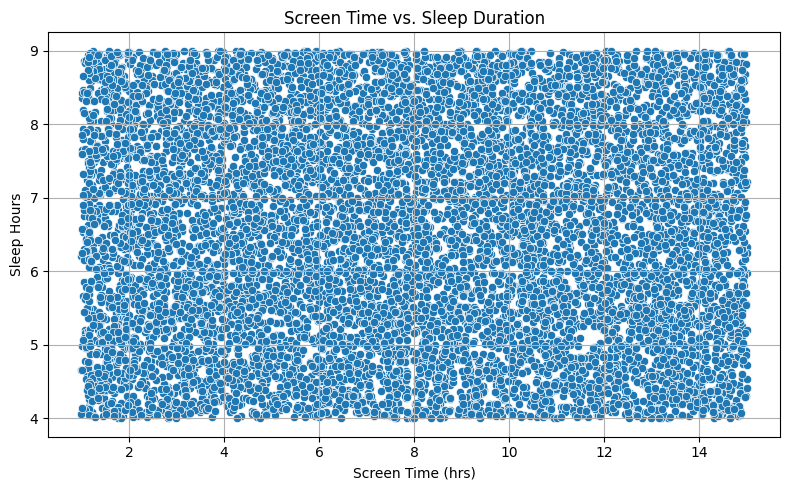

In [9]:
# First, install seaborn if you haven't already
!pip install seaborn

# Then import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Scatter plot: Screen Time vs. Sleep
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Screen_Time_Hours", y="Sleep_Hours")
plt.title("Screen Time vs. Sleep Duration")
plt.xlabel("Screen Time (hrs)")
plt.ylabel("Sleep Hours")
plt.grid(True)
plt.tight_layout()
plt.show()


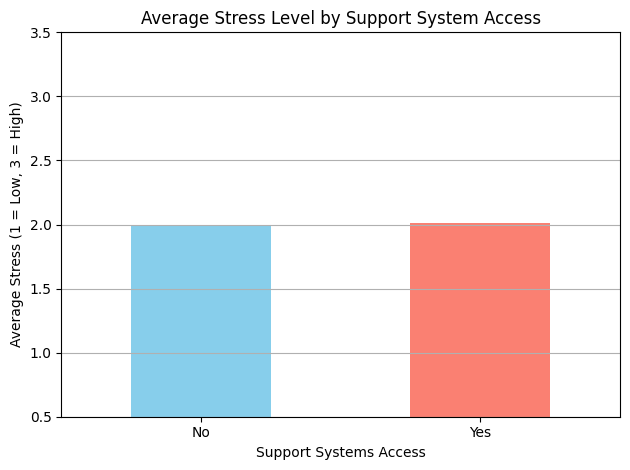

In [11]:
import matplotlib.pyplot as plt

# 📊 Bar chart: Support Systems vs. Stress Level
support_stress = df.groupby("Support_Systems_Access")["Stress_Level"].apply(lambda x: x.map(stress_mapping).mean())

support_stress.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Average Stress Level by Support System Access")
plt.ylabel("Average Stress (1 = Low, 3 = High)")
plt.xlabel("Support Systems Access")
plt.xticks(rotation=0)
plt.ylim(0.5, 3.5)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
